In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import hurst

In [2]:
dt = 1/252
mu = 0.03 # математичне сподівання 
sigma = 0.154 # дисперсія
sqrt_dt = math.sqrt(dt)
def monte_carlo(motion,n):
    t = 0
    if motion=='g':
        x=1
    elif motion=='a':
        x=0
    elif motion=='b':
        x=mu
    x_array=[]
    results=0
    for i in range(n):
        t += dt
        eps = np.random.normal(0, 1)
        if motion=='a':
            x += (mu * dt + sigma * sqrt_dt * eps)
        elif motion=='g':
            x += (mu*x * dt + sigma* x * sqrt_dt * eps)
        elif motion=='b':
            x+=(sigma-x)/(1-t)*dt+eps
            #x+=(1-t)*mu+t*sigma+eps
        x_array.append(x)
        
    plt.plot(x_array)
    return x_array

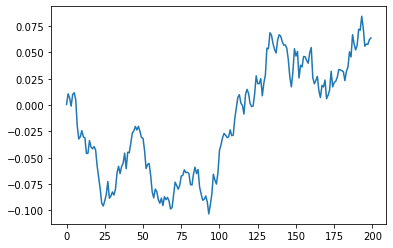

In [21]:
ar_mot=monte_carlo('a',200)

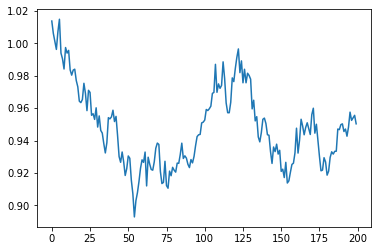

In [20]:
geom_mot=monte_carlo('g',200)

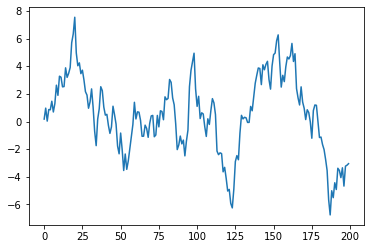

In [18]:
br_mot=monte_carlo('b',200)

In [22]:
ar_mot=[i+0.1+abs(min(ar_mot)) for i in ar_mot]
H, c, result = hurst.compute_Hc(ar_mot, kind='price', simplified=True)
H

0.6681824792790927

In [23]:
H, c, result = hurst.compute_Hc(geom_mot, kind='price', simplified=True)
H

0.4909062958573563

In [19]:
br_mot=[i+0.1+abs(min(br_mot)) for i in br_mot]
H, c, result = hurst.compute_Hc(br_mot, kind='price', simplified=True)
H

0.9169459503663182